In [1]:
#Open the list selected from the Benjamini-Yekutieli selection
import pickle
import pandas as pd
with open("list_X_ecg_3YNB_NS.bin", "rb") as data:
    list_X_ecg = pickle.load(data)
    
#Load the datasets
X_internal = pd.read_csv('X_internal_3Y_NS.csv',index_col=0)
X_external = pd.read_csv('X_external_3Y_NS.csv',index_col=0)
y_external = pd.read_csv('y_external_3Y_NS.csv',index_col=0)
y_internal = pd.read_csv('y_internal_3Y_NS.csv',index_col=0)

#Select the time-series features that are to be used
X_ecg_sel = X_internal[list_X_ecg]
y_internal = y_internal['ICDnonbenefit_3Y']

#Select the clinical variables to be used, these are not added to the RFECV and are joined to the selected time-series features later
X_clin = X_internal.iloc[:, :50]

print(X_ecg_sel.shape)
print(y_internal.shape)
print(len(list(X_ecg_sel)))

(550, 250)
(550,)
250


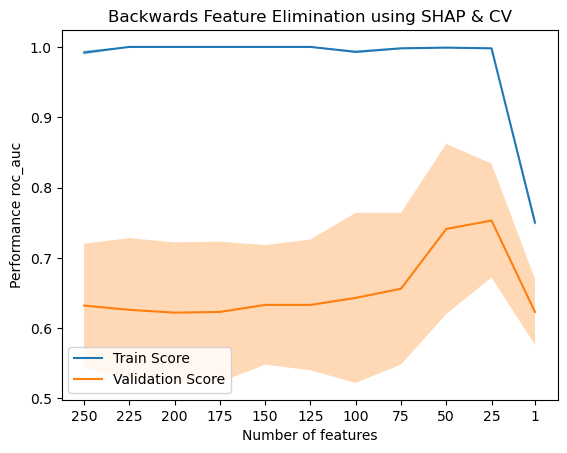

In [2]:
'''''
Define the optimal number of features to select by using ShapRFECV, ShapRFECV function is called (https://ing-bank.github.io/)
Arguments:
X = Dataset with variables
y = Outcome variable
steps = number of features to remove per step

Author: MZH Kolk, 2022 Oct
'''''

#Run ShapRFECV function
from ShapRFECV import ShapRFECV
shap_plot, shap, report = ShapRFECV(X = X_ecg_sel, y = y_internal, steps = 25)

In [7]:
'''''
Select optimal number of features by rerunning the ShapREFCV with specified number as input variable

X_df = Input dataframe
y = Label to train on
number_of_features = Number of features to extract
steps = number of features to remove per step

Step 1. Run ShapREFCV and select the top x number of features
Step 2. Load X_internal and select these variables
Step 3. Save the dataframes and load them again for reproducibility
'''''

#Select optimal number of ECG features based on the ShapRFECV
from ShapRFECV_selection import ShapRFECV_selection
shap_elimination, extracted_ECG_features, \
X_ecg_rfecv = ShapRFECV_selection(X_df = X_ecg_sel, y = y_internal, number_of_features=50, steps=10)

#Load the internal dataset and select the features
X_internal = pd.read_csv('X_internal_3Y_NS.csv',index_col=0)
X_internal_selectedfeatures = X_internal[list(X_ecg_rfecv)]
print('Number of features selected', X_internal_selectedfeatures.shape)

#Join the selected ECG features and clinical variables and save
X_internal = X_internal_selectedfeatures.join(X_clin)
X_internal.to_csv('X_internal_featuresselected_NB3Y_NS.csv')
y_internal.to_csv('y_internal_featuresselected_NB3Y_NS.csv')

Number of features selected (550, 50)
